# RAIA

### Libraries

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer 

from sklearn.metrics import silhouette_score as ss

import plotly.express as px

import itertools

from matplotlib import gridspec 

from sklearn.datasets import make_blobs

from seaborn import scatterplot as scatter

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

from statsmodels.tsa.arima_model import ARIMA

import statsmodels.api as sm

import statsmodels.tsa.api as smtsa

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.stattools import adfuller

from tqdm import tqdm_notebook

from itertools import product

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.metrics import median_absolute_error, mean_squared_log_error

The Dow Jones Industrial Average, Dow Jones, or simply the Dow, is a stock market index of 30 prominent companies listed on stock exchanges in the United States. The DJIA is one of the oldest and most commonly followed equity indexes. Wikipedia

https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average

https://www.investopedia.com/terms/a/autocorrelation.asp#:~:text=Autocorrelation%20is%20the%20correlation%20of,movements%20and%20predict%20future%20ones.

https://onlinestatbook.com/2/estimation/mean.html

https://www.westga.edu/academics/research/vrc/assets/docs/confidence_intervals_notes.pdf

https://finance.yahoo.com/quote/RADL3.SA/history

## MAYBE USE JUST CLOSE BECAUSE IT IS THE MAIN FEATURE, THE IMPORTANT ONE TO PREDICT

but maybe I can use low to see how much would I lose in a day, what is the mean average of losing

In [2]:
import pandas as pd

# Read the CSV file and set the "Date" column as the index
raia = pd.read_csv("RADL3.SA.csv", usecols=["Date", "Close"], index_col="Date", parse_dates=True)

# Display the DataFrame with the index set to "Date" and only the "Close" column
print(raia)


                Close
Date                 
2012-01-02   2.538461
2012-01-03   2.576923
2012-01-04   2.576923
2012-01-05   2.557692
2012-01-06   2.548076
...               ...
2023-12-21  29.020000
2023-12-22  28.889999
2023-12-26  29.420000
2023-12-27  29.160000
2023-12-28  29.400000

[2977 rows x 1 columns]


raia = pd.read_csv("RADL3.SA.csv")

import pandas as pd

# read the file (AirPassengers.csv) and store in the dataframe
raia = pd.read_csv("RADL3.SA.csv", header = 0, parse_dates = [0], 
                             names = ["Date", "Close"], index_col = 0)

# The resulting DataFrame df will have the "Date" column parsed as datetime objects, which allows
#you to perform datetime 
# operations on that column. For instance, you can filter data by date ranges or
#extract specific date components.

# Display first 5 records
raia.head(30)

In [3]:
raia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2977 entries, 2012-01-02 to 2023-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2977 non-null   float64
dtypes: float64(1)
memory usage: 46.5 KB


In [4]:
raia.head(1)

Close
Date                
2012-01-02  2.538461

# Store the 'Date' column into dataframe 'djia_df'
raia["Date"] = pd.to_datetime(raia["Date"])


# Attach your own 'Data' index to the dataframe
raia.index = raia["Date"]

# Drop the 'Date' column from the dataframe
raia.drop("Date", axis = 1, inplace = True)

In [5]:
raia.tail(1)

Close
Date             
2023-12-28   29.4

In [6]:
raia.describe()

Close
count  2977.000000
mean     13.890264
std       8.063742
min       2.519230
25%       4.903846
50%      13.138461
75%      21.673077
max      29.600000

<Axes: xlabel='Date'>

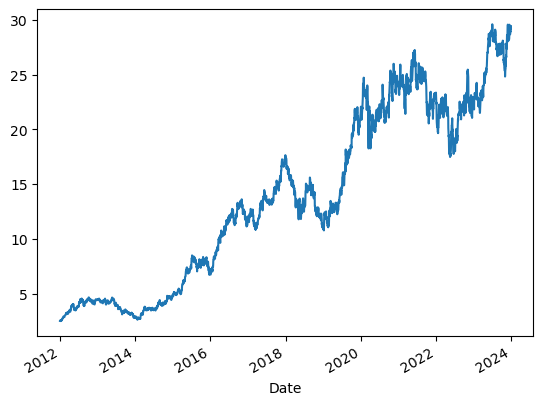

In [7]:
raia["Close"].plot()

# Plot the bar chart for 1950

year_1950_data = air_passengers.loc['1950']
year_1950_data.plot(kind = 'bar')

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '2012')

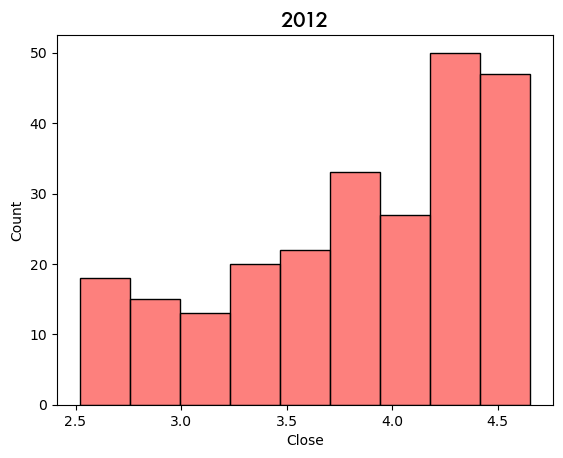

In [8]:
sns.histplot(data = raia, x = raia["Close"].loc["2012"],  color = "#FD5551")
plt.title("2012", font = "Futura", fontsize = 15)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

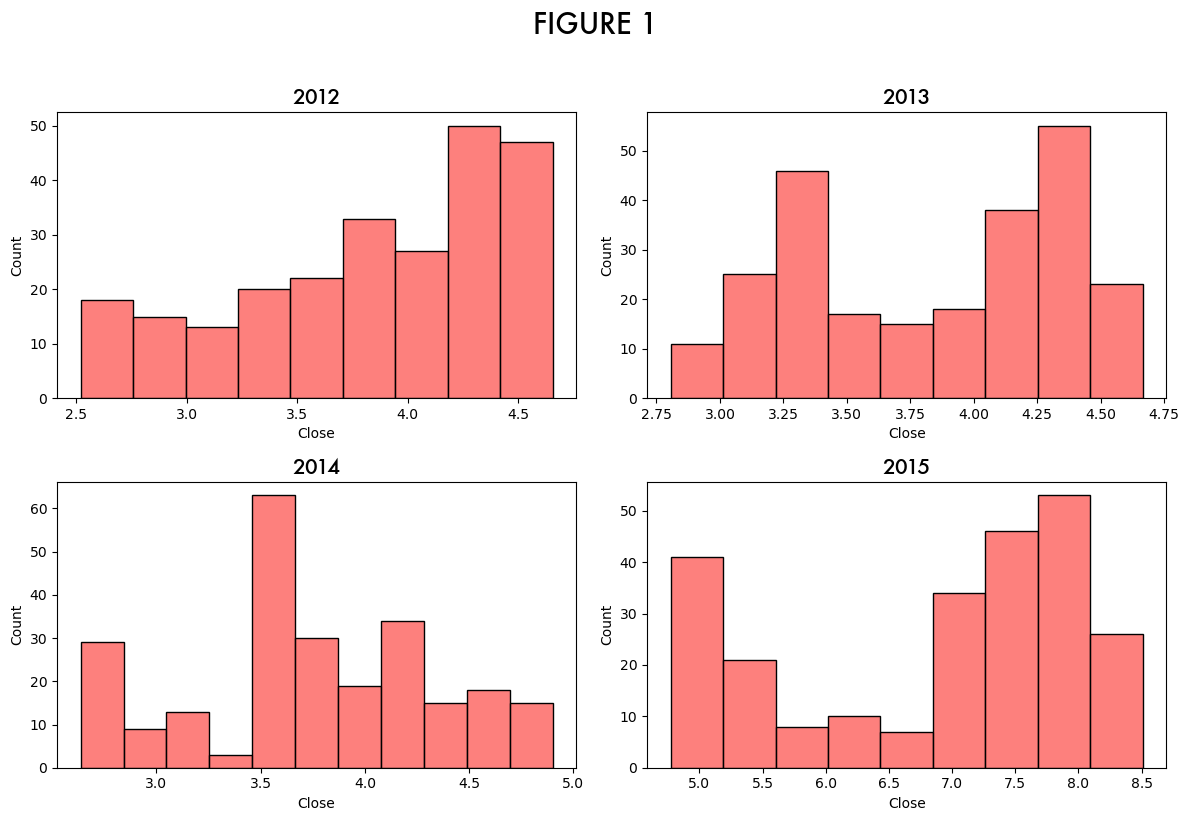

In [9]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))


sns.histplot(data = raia, x = raia["Close"].loc["2012"], ax = axes[0, 0], color = "#FD5551")
axes[0, 0].set_title("2012", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2013"], ax = axes[0, 1], color = "#FD5551")
axes[0, 1].set_title("2013", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2014"], ax = axes[1, 0], color = "#FD5551")
axes[1, 0].set_title("2014", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2015"], ax = axes[1, 1], color = "#FD5551")
axes[1, 1].set_title("2015", font = "Futura", fontsize = 15)


#plt.yticks(font = "Futura", fontsize = 12)
#plt.xticks(font = "Futura", fontsize = 12)

fig.suptitle("FIGURE 1", y = 1.02, font = "Futura", fontsize = 20)

plt.tight_layout()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

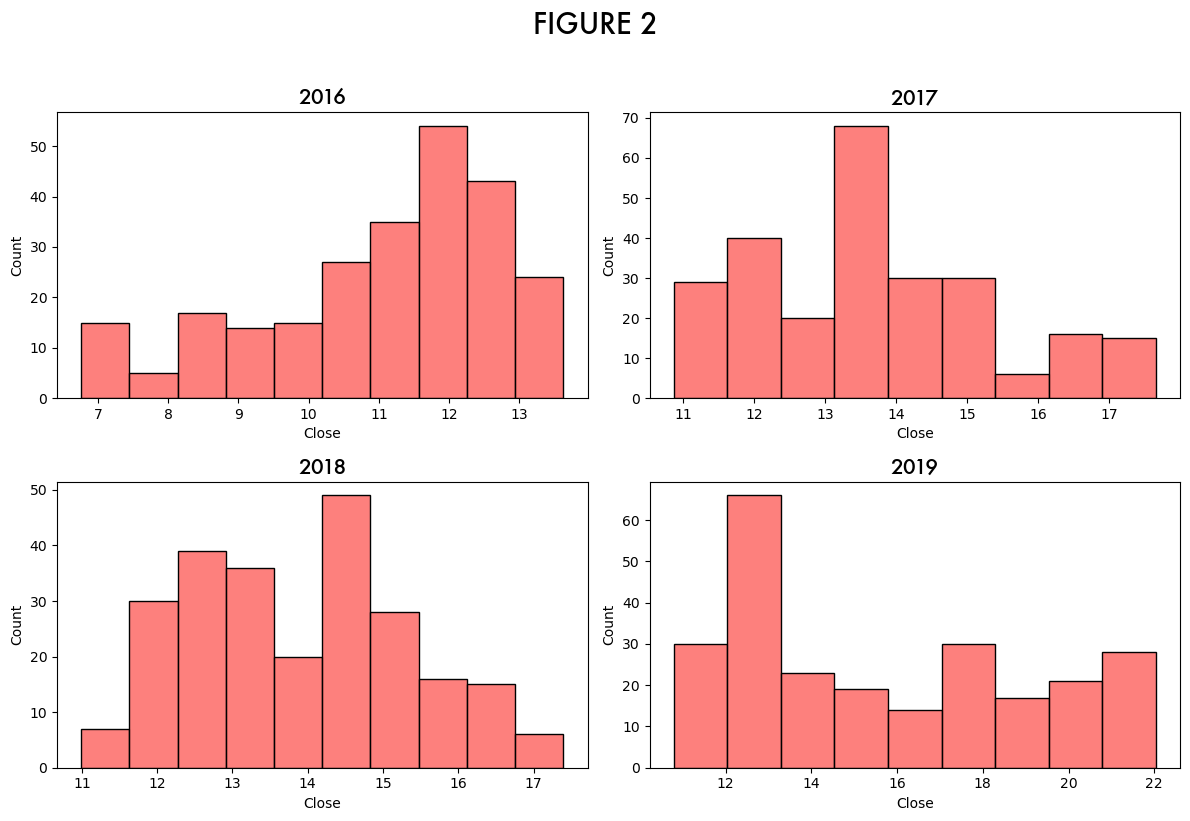

In [10]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))


sns.histplot(data = raia, x = raia["Close"].loc["2016"], ax = axes[0, 0], color = "#FD5551")
axes[0, 0].set_title("2016", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2017"], ax = axes[0, 1], color = "#FD5551")
axes[0, 1].set_title("2017", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2018"], ax = axes[1, 0], color = "#FD5551")
axes[1, 0].set_title("2018", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2019"], ax = axes[1, 1], color = "#FD5551")
axes[1, 1].set_title("2019", font = "Futura", fontsize = 15)


#plt.yticks(font = "Futura", fontsize = 12)
#plt.xticks(font = "Futura", fontsize = 12)

fig.suptitle("FIGURE 2", y = 1.02, font = "Futura", fontsize = 20)

plt.tight_layout()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

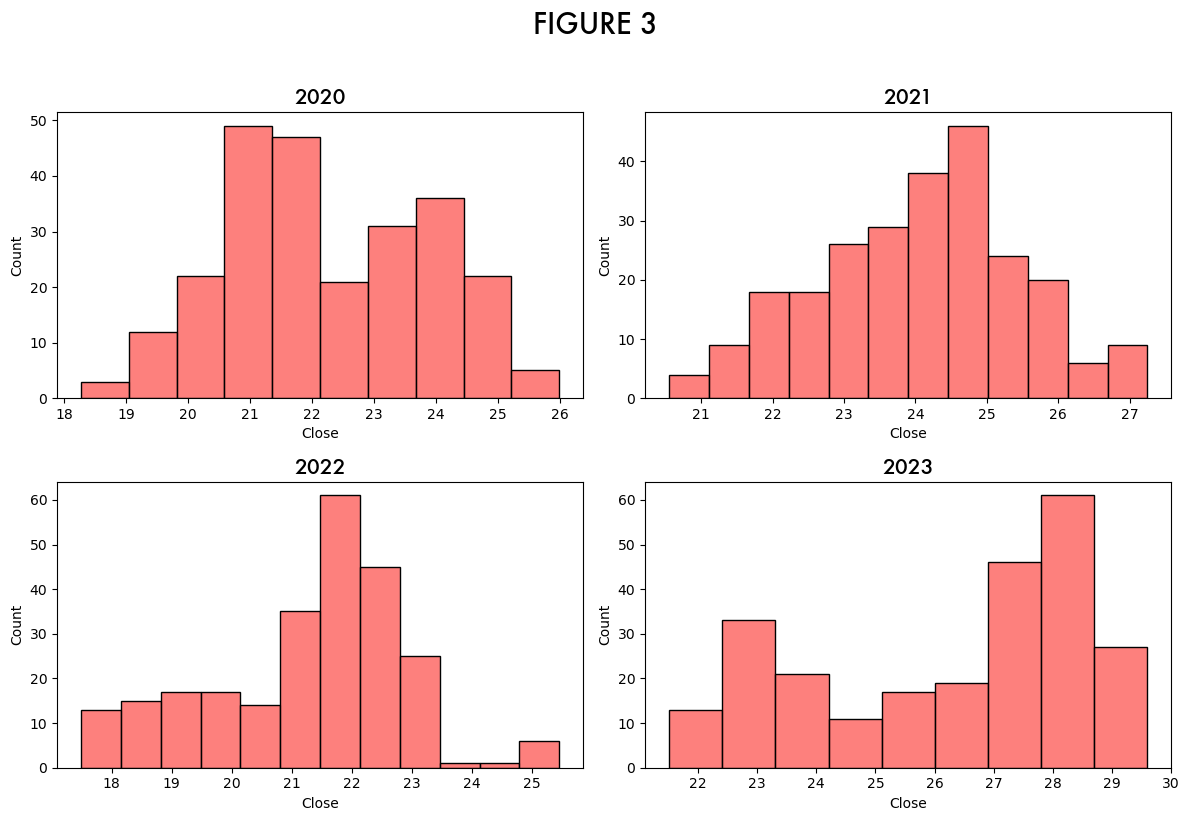

In [11]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))


sns.histplot(data = raia, x = raia["Close"].loc["2020"], ax = axes[0, 0], color = "#FD5551")
axes[0, 0].set_title("2020", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2021"], ax = axes[0, 1], color = "#FD5551")
axes[0, 1].set_title("2021", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2022"], ax = axes[1, 0], color = "#FD5551")
axes[1, 0].set_title("2022", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2023"], ax = axes[1, 1], color = "#FD5551")
axes[1, 1].set_title("2023", font = "Futura", fontsize = 15)


#plt.yticks(font = "Futura", fontsize = 12)
#plt.xticks(font = "Futura", fontsize = 12)

fig.suptitle("FIGURE 3", y = 1.02, font = "Futura", fontsize = 20)

plt.tight_layout()

<Axes: xlabel='Date'>

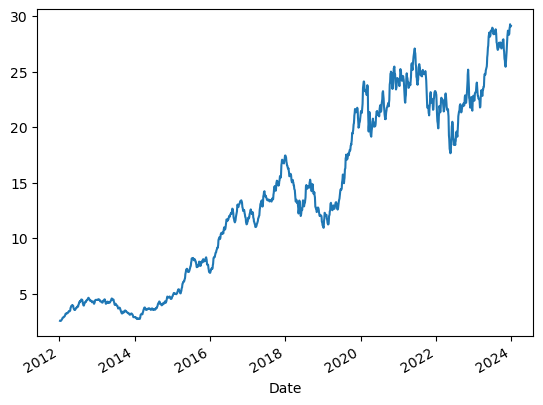

In [12]:
# first test, informally, plot the moving average
# note the ROLLING function
# air_passengers.rolling(window = 60).mean().plot()
raia["Close"].rolling(window = 6).mean().plot()

O código air_passengers.rolling(window=6).mean().plot() está calculando a média móvel dos dados em air_passengers usando uma janela de tamanho 6 e, em seguida, plotando o resultado.

Aqui está o que cada parte do código faz:

air_passengers: É o conjunto de dados que você está usando para plotar a média móvel.
.rolling(window=6): Isso cria uma janela de tamanho 6 que se move ao longo dos dados. A função rolling do pandas permite calcular estatísticas, como média, desvio padrão, etc., em uma janela deslizante ao longo dos dados.
.mean(): Isso calcula a média dos valores dentro da janela deslizante para cada ponto de dados.
.plot(): Isso plota os valores calculados da média móvel em um gráfico.
Portanto, o resultado será um gráfico que mostra a média móvel dos dados em air_passengers com uma janela de tamanho 6. Isso pode ser útil para visualizar tendências suavizadas nos dados originais, ajudando a identificar padrões ao longo do tempo.

## How can we see whether the variance changes over time?

<Axes: xlabel='Date'>

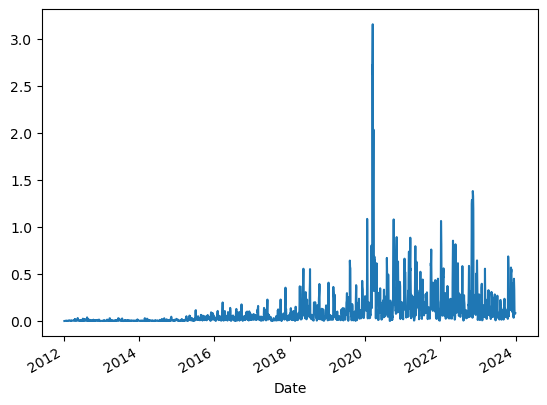

In [13]:
# Can you plot the autocorrelation?
from statsmodels.tsa.stattools import acf

# How should you size your window?
raia["Close"].rolling(window = 6).var().plot()

# Window Size: The window parameter specifies the size of the rolling window. In your example, window=60 means that 
# the rolling window will consist of 60 consecutive data points at a time.

## Stationary Time series

import numpy as np

# Aplicando a função log à série 'Close'
log_close = np.log(raia["Close"])
log_close.plot()


<Axes: xlabel='Date'>

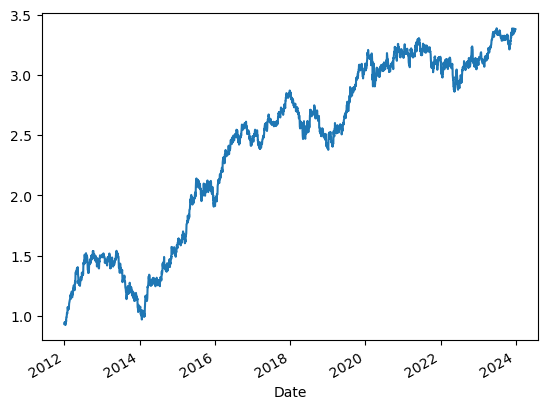

In [14]:
import numpy as np
# One method to get rid of time varying variance is to do a power or log transformation that punishes larger values
# more than smaller values
log_close = raia.Close.apply(lambda x: np.log(x))
log_close.plot()

In [15]:
log_close.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2977 entries, 2012-01-02 to 2023-12-28
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2977 non-null   float64
dtypes: float64(1)
memory usage: 46.5 KB


<Axes: xlabel='Date'>

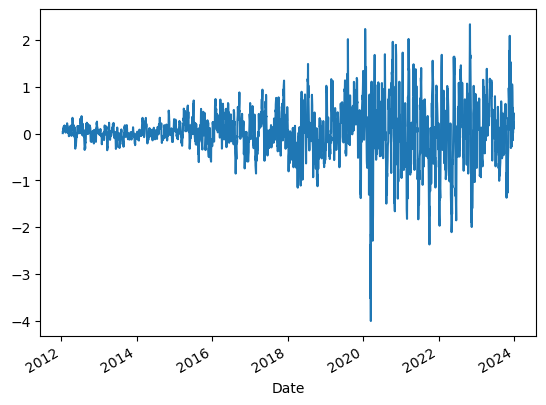

In [16]:
# What if we subtract this rolling mean from the original series?
rolling_mean = raia["Close"].rolling(window = 12).mean()

# Subtract rolling_mean from the air_passengers
passengers_detrended = raia["Close"] - rolling_mean

# Display the plot
passengers_detrended.plot()

<Axes: xlabel='Date'>

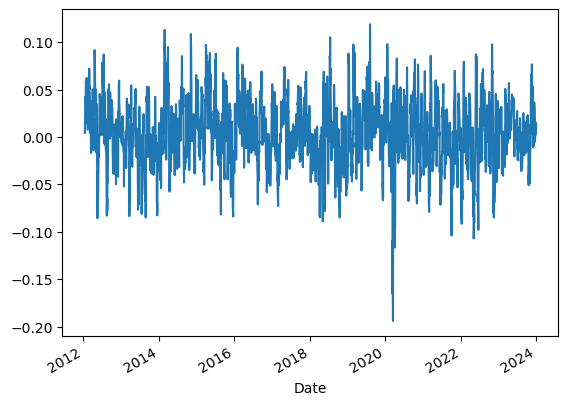

In [17]:
# Exercise: try detrending after taking the log. How does that look?
log_rolling_mean = log_close.rolling(window = 12).mean()
log_detrended = log_close - log_rolling_mean
log_detrended.plot()

# Seasonality

<Axes: xlabel='Date'>

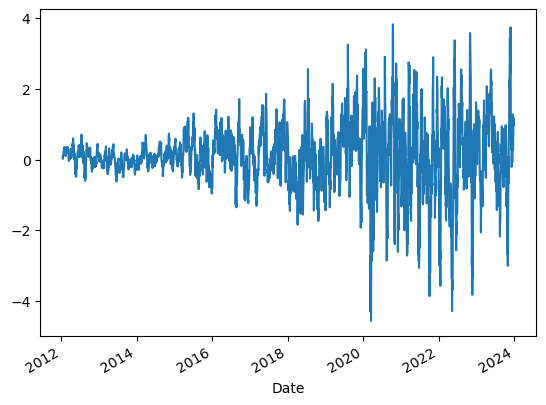

In [18]:
# shift() Shift index by desired number of periods with an optional time `freq`.
# By default It shifts 1 period, check the example details using shift + tab
(raia["Close"] - raia["Close"].shift(12)).plot()

<Axes: xlabel='Date'>

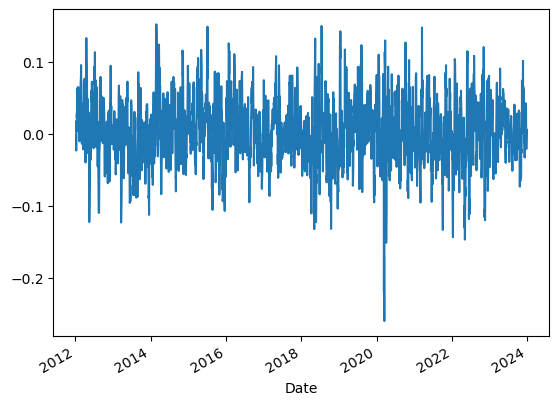

In [19]:
# One common technique is differencing, let's start with log_passengers
log_passengers_diff = log_close - log_close.shift(6)
log_passengers_diff.plot()

## Time series = Trend + Seasonality + Residuals

    
- **Trend**: general direction of the series (e.g. increasing)
- **Sesonality**: repeating patterns in data (e.g. sales around holidays..)
- **Residuals**: the rest

`statsmodels.tsa.seasonal.seasonal_decompose()` takes a DataFrame and returns an object with attributes:
- `.trend`
- `.seasonal`
- `.resid`
each containing the time series that encodes the corresponding part of the original series, 

and a method
- `.plot()`
which makes 4 plots:  original series + 3 its components

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
# interpolate() means replacement of values if some data is missed
# log_passengers.interpolate(inplace = True)

log_close.interpolate(inplace = True)

# decompose the data using seasonal_decompose() function
decomposition = seasonal_decompose(log_close, model = 'additive')

# The additive model is Y[t] = T[t] + S[t] + e[t]

# The multiplicative model is Y[t] = T[t] * S[t] * e[t]

# Plot the function using plot()
decomposition.plot()
pyplot.show()

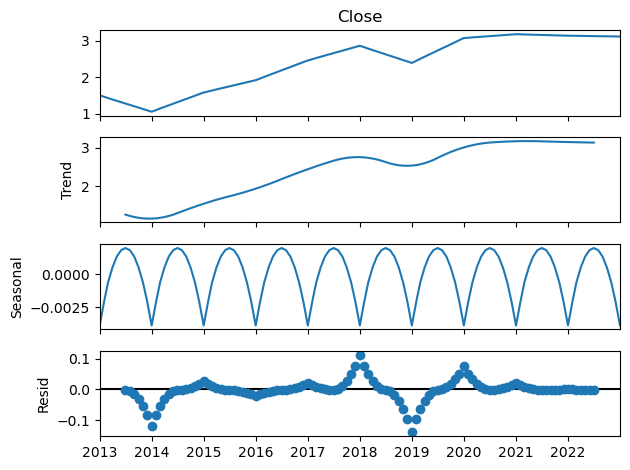

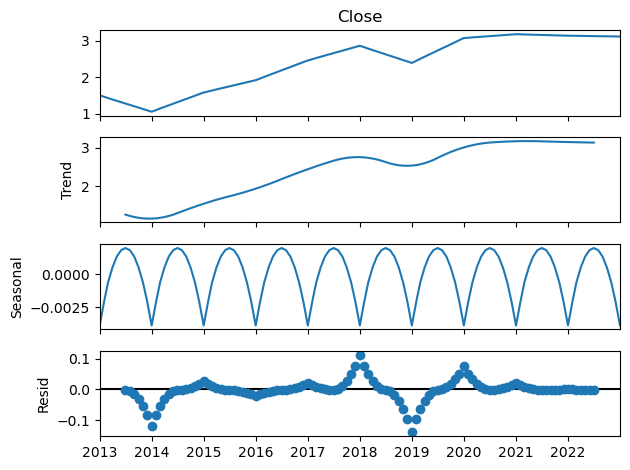

In [31]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming log_close is your Series with the "Date" as index
log_close.index = pd.to_datetime(log_close.index)

# Specify the frequency of the data (e.g., 'D' for daily, 'M' for monthly)
log_close = log_close.asfreq(freq='M')

# Interpolate missing values if any
log_close.interpolate(inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(log_close, model='additive')

# Plot the decomposition
decomposition.plot()


# Dicky Fuller Test

In [32]:
series = raia["Close"].values

In [33]:
from  statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag = 'AIC')

In [34]:
# Augmented Dickey-Fuller test
ADF_result = adfuller(raia["Close"])

# Display the results
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.22565310424687243
p-value: 0.9353939532433997


In [36]:
# Take the difference
raia_diff = np.diff(raia["Close"], n = 1)

In [37]:
# Augmented Dickey-Fuller test
ADF_result = adfuller(raia_diff)

# Display the results
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -12.899882878850772
p-value: 4.270379912219322e-24


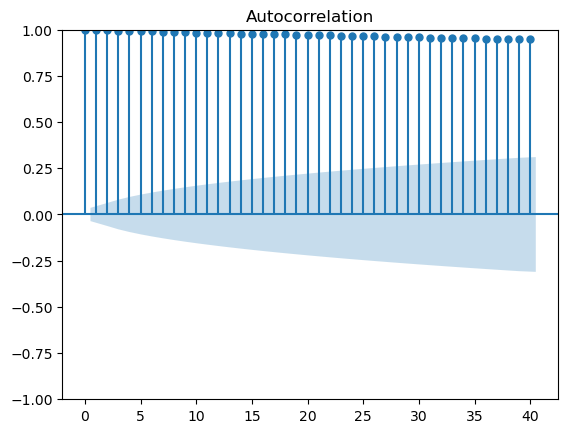

In [39]:
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of data_monthly
plot_acf(raia, lags = 40); 

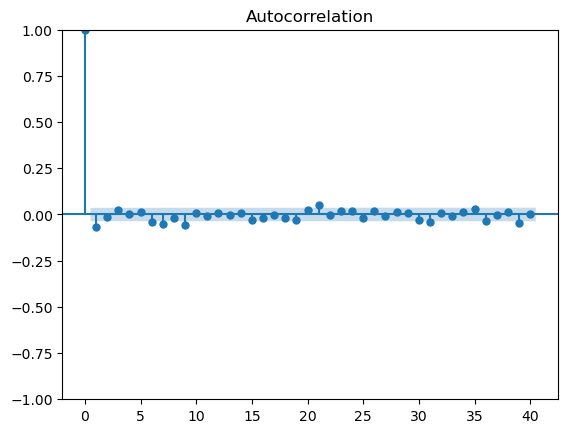

In [40]:
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of data_monthly
plot_acf(raia_diff, lags = 40); 